# Theory Of Neural Network

All of this notes are from a Talk by Beau Carnes that can accessed through this <a href="https://www.youtube.com/watch?v=u7n9t1cBei8&list=WL&index=7&ab_channel=freeCodeCamp.org" target="_blank">This link.</a>

### In machine learning we have two types of problems (apart from reinforcement learning):
- **Supervised learning**:
  - We have a set of data with its characteristics and its labels. We insert this data into the machine learning algorithm and the machine learning is going to abstract patterns (learn patterns) that gives a abswer with a high probability to be similar the correspondent label. The goal is to correctly maps: DATA -> Patterns -> Correct Label.
- **Unsupervised learning**: 
  - In this type of problem, the algorithm assumes the data does not contain labels. It's supposed for the algorithm itself find patterns that can group (clustering, etc.) the data that shares similar characteristics.
  
- **Parametric**:
    - fixed number of parameters. Try and errors.
- **Non-parametric**:
    - Possibly infinite parameters. Couting and probability to figure out.
    
### More about parametric and non-parametric algorithms:
    
  
### Most of the machine learning algorithms are supervised parametric learning

The idea is to predict something, then compare it with the correct answer and based on this comparison the algorithm is going to start to learn. The algorithm adjusts the weights based on the errors, trying to decrease this error. that's parametric.

### Simple Neural networks

One or more weights which we can multiply by our input data to make a prediction. Generally, the weights start with random numbers, and thoughout the iterations it will be adjusted until it generalizes.
              
              

input data => weight => prediction.

In [1]:
weight = 0.1
def neural_network(input, weight):
    prediction = input * weight
    return prediction

In [2]:
number_of_toes = [8.5, 9.5, 10, 9]
input = number_of_toes[0]
pred = neural_network(input, weight)
print(pred)

0.8500000000000001


input data = a number recorded in the real world

prediction = what the neural network tells us given our input data

networks learns through trial and error

### Multiple Neural Networks

The neural can have multiple inputs and multiple outputs

<img src="illustration.png" width="50%"/>

In [11]:
def neural_net(input, weights):
    # in numpy this could be reduced by input.dot(weights) => multiply input by weights
    return vect_mat_mul(input, weights)

In [12]:
weights = [[0.1, 0.1, -0.3],
           [0.1, 0.2, 0.0],
           [0.0, 1.3, 0.1]] 
# = we have here, 3 neurons in a layers, in this three neurons we must have 
# a weight associated with each one of the three characteristics weights[0] is the weights associated with neuron 1
# for the three characteristic, the same goes for the others. weights[1] = neuron 2

In [15]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

In [16]:
input = [toes[0], wlrec[0], nfans[0]]

In [18]:
def vect_mat_mul(vect, matrix):
    output = [0] * len(vect) # creating a array of three elements
    print("Output: ", output)
    for i in range(len(output)):
        # in output i we are going to save a result of the sum of the weights for a specific input
        # vect is the input with, in this example 3 data from 3 different characteristics
        # matrix i is the weights for the neurons in a layer
        # in this case the input data is going to be multiply by its weights and this function (w_sum) 
        # is going to return the sum of the inputs * weigths
        output[i] = w_sum(vect, matrix[i])
    return output # return the result of the weights

In [20]:
def w_sum(a, b):
    # verifying if vectors are the same length
    assert(len(a) == len(b))
    output = 0 # is going to store the sum
    for i in range(len(a)):
        output+= (a[i] * b[i]) # input times weight
    return output

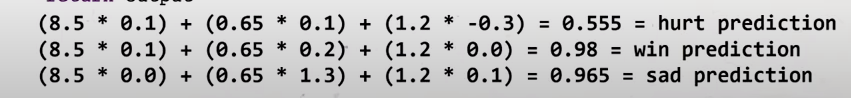

In [21]:
pred = neural_net(input, weights)
print(pred)

Output:  [0, 0, 0]
[0.555, 0.9800000000000001, 0.9650000000000001]


<img src="https://raw.githubusercontent.com/sausheong/gonn/master/imgs/weights.png" width=50%/>

# Error and Gradient Decescent

 - **Gradient descent**:
    - Allows us to calculate both the direction and the amount that we should change our weight, so that we reduce our error.
    Helps to figure out which direction we should move our weights and how much, so that the error goes down. near to zero.
So far we've seen only predicition, but now we must do:
 - Step 2: compare to truth pattern
 - Step 3: Learn the pattern and figure out how the weights must change in order to reduce the error
 
**Learning = adjusting our error to reduce the error to zero** 

### Example, one iteration at a time

Alpha is the simplest way to prevent over correct our weights. Sometimes our weights instead of goes down, it goes up.
It's kind of a try and error which value of alpha to choose. **Learning rate** is a parameter, denoted by α(alpha), is used to tune how accurately a model converges on a result

<img src="https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png" width=70%/>

In [22]:
# 1) An empty network
weight = 0.1
alpha = 0.01

def neural_network(input, weight):
    pred = input * weight
    return pred

<img src="https://images-na.ssl-images-amazon.com/images/I/61FnLm3qGNL.jpg" width=50%/>

In [30]:
## 2) PREDICT: making a prediction and evaluating error
number_of_toes = [8.5] # just one input
win_or_lose_binary = [1] # won

input = number_of_toes[0]
pred = neural_network(input, weight);
print("Prediction is: {}".format(pred))
goal_pred = win_or_lose_binary[0];

meta_pred = win_or_lose_binary[0];

## Evaluating the error
## This is the squared error
# pred - goal_pred is how much is the error
# the reason for the square is to force the error to be positive
# added a benefit to make big errors larger and smaller errors smaller.
# which helps the neural network learn faster

error = (pred - goal_pred) ** 2
print('Error: {}'.format(error))

Prediction is: 0.8500000000000001
Error: 0.022499999999999975


Delta = how much this node missed

In [31]:
# Step 3: COMPARE: calculating "node delta" and putting it on the output node
delta = pred - goal_pred
print('Delta: {}'.format(delta))

Delta: -0.1499999999999999


**This is where gradient descent happers**

Weight delta = how much this weight caused the network to miss

The Delta rule in machine learning and neural network environments is a specific type of backpropagation that helps to refine connectionist ML/AI networks, making connections between inputs and outputs with layers of artificial neurons.

The Delta rule is also known as the Delta learning rule.

In [32]:
# Step 4: LEARN: calculating the weight delta, and putting it on the weight
weight_delta = input * delta

In [34]:
# Step 5: LEARN: updating the weight
# alpha = to address how fast the network learn
weight-=weight_delta * alpha
print(weight)

0.11275


# Application of this in a Real world problem 

## Try to figure out which configuration means to stop or walking 

<img src="realworldproblem.png" width=50%/>

## Data we collected:

<img src="realworldproblem2.PNG" width=50%/>

### The middle light is perfectly correlated with **walk or stop**

### In a neural network we must convert the data to numbers

<img src="realworldproblem3.PNG" width=20%/>

### If the light is 1 = on, 0 = off

### Real world diagram

<img src="realworldproblem4.PNG" width=40%/>

In [36]:
# import
import numpy as np

In [56]:
# allows to do special operations with numpy
# in a neural network the weights start randomly
# the neural is going to adjust those weights, so it does not matter how it start
# just one neuron, with three weights, [0] = blue light, [1] = orange light and [2] = purple light
weights = np.array([.7, .2, -0.5]) 
# learning rate
alpha = 0.1
# this is an array of arrays. each line correspond to a new data with 3 characterisitcs which are blue orange and purple light
streetlights = np.array([ [0, 0, 1],
                          [0, 1, 1],
                          [0, 0, 1],
                          [1, 1, 1],
                          [0, 1, 1],
                          [1, 0, 1] ])

# this saves the real world data 0 = stop, 1 = walk
walk_or_stop = np.array([0, 1, 0, 1, 1, 0])

In [57]:
# everytime we iterate the weights are adjusted
# the number of iterations is try and error
for iteration in range(40):
    error_for_all_lights = 0
    # in order to pass through all data
    for row_index in range(len(walk_or_stop)):
        input = streetlights[row_index]
        goal_prediction = walk_or_stop[row_index]
        # this multiply input times weights and gives a vector
        # since there's only one neuron, it should gives only the sum of inputs * weight for that single neuron
        prediction = input.dot(weights)
        # getting the error, checking how far away the prediction is from what we thought this was gonna be
        error = (prediction - goal_prediction) ** 2
        # colleting all the errors for all inputs
        # we want the collective error to be as close to 0 as possible
        error_for_all_lights+=error 
        # calculate the delta
        delta = prediction - goal_prediction
        # calculate the weights (input * delta is the weight delta)
        weights = weights - (alpha * (input * delta))
        # prediction for each iteration
        print("Prediction: {}".format(prediction))
        
    print("Weights: {}".format(weights))
    print("Error: {}".format(error))

Prediction: -0.5
Prediction: -0.25
Prediction: -0.325
Prediction: 0.7324999999999999
Prediction: 0.08600000000000002
Prediction: 0.5524
Weights: [ 0.67151  0.44315 -0.22959]
Error: 0.30514576
Prediction: -0.22959000000000002
Prediction: 0.23651899999999998
Prediction: -0.13028289999999998
Prediction: 1.0737534899999999
Prediction: 0.387492792
Prediction: 0.6007554128000001
Weights: [ 0.60405911  0.57337347 -0.12345478]
Error: 0.36090706600849853
Prediction: -0.12345477947999997
Prediction: 0.46226417026800004
Prediction: -0.057335718558799965
Prediction: 1.17960401779028
Prediction: 0.539624104512224
Prediction: 0.5625737490078015
Weights: [ 0.52984133  0.65522424 -0.07978233]
Error: 0.3164892230726929
Prediction: -0.07978233383395053
Prediction: 0.583420142092394
Prediction: -0.030146114659794873
Prediction: 1.1995920581800865
Prediction: 0.6298323135038775
Prediction: 0.4998081868599713
Weights: [ 0.45990131  0.71393979 -0.06005476]
Error: 0.249808223652252
Prediction: -0.06005475904

The really important information here would be the weights
The closer to 1 the weights are, the more correlated they are with the 1
1 is perfectly correlated and 0 not correlated at all.
yellow light which is the weight [1] is really close to 1, which shows that this data is really correlated

### Deep neural network is when we have hidden layers in between input and output

When the data is not much correlated. we create another layer that is a bit more correlated with the output
The intermediate dataset is the hidden layer. It's like a new dataset with more correlated data.

<img src="realworldproblem5.png" width=50%/>

Continue to study this talk. check this code https://colab.research.google.com/drive/1KkS2B8Q_hw7-e2eYleRtVIOudV-5aNaW